In [29]:
from first_functions import *

In [32]:
from pmdarima import ARIMA
from sklearn.base import BaseEstimator, RegressorMixin

class ARIMAModel(BaseEstimator, RegressorMixin):
    def __init__(self, order=(1, 1, 1)):
        self.order = order
        self.model = None
    
    def fit(self, X, y):
        self.model = ARIMA(order=self.order)
        self.model.fit(y)
        return self
    
    def predict(self, X):
        n_periods = len(X)
        return self.model.predict(n_periods=n_periods)
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return -mean_squared_error(y, y_pred)

ModuleNotFoundError: No module named 'pmdarima'

In [23]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

import csv
import datetime as dt
import io
import re
import zipfile
from pathlib import Path

import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

from geopy.distance import geodesic

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet, BayesianRidge, LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor



In [7]:
### obtain dataset

directory_stations_2020 = "C:\\Users\\renan\\OneDrive\\Documentos\\GitHub\\Consume_and_Weather_dissertação\\dados_metereo_rj\\raw\\2020_rj"

os.chdir(directory_stations_2020)

In [8]:
filepath_2023 = "C:\\Users\\renan\\Downloads\\2023.zip"

#usando a função de compilar os datasets da base.

df_stations_2023 = read_zipfile(filepath_2023)

100%|██████████| 567/567 [02:39<00:00,  3.56it/s]


In [18]:
df_stations_2023.columns

Index(['data', 'hora', 'precipitacao', 'pressao_atmosferica',
       'pressao_atmosferica_maxima', 'pressao_atmosferica_minima', 'radiacao',
       'temperatura_ar', 'temperatura_orvalho', 'temperatura_maxima',
       'temperatura_minima', 'temperatura_orvalho_maxima',
       'temperatura_orvalho_minima', 'umidade_relativa_maxima',
       'umidade_relativa_minima', 'umidade_relativa', 'vento_direcao',
       'vento_rajada', 'vento_velocidade', 'ano', 'mes', 'dia', 'regiao', 'uf',
       'estacao', 'codigo_wmo', 'latitude', 'longitude', 'altitude',
       'data_fundacao'],
      dtype='object')

In [14]:
### necessário tratar missing values
"TRANSFORMAÇÃO DA BASE"

df_stations = tratando_missing_values(df_stations_2023)


#caso o usuário da biblioteca queira testar o efeito de algum outro dataset com variável nox é no mínimo necessário que
#os timesteps de ambas as bases estejam iguais para o possível join.

"função para transformação do timestep em data e hora e junção das bases nox"

# df_stations_nox = join_databases(df_stations, databasenox)

'função para transformação do timestep em data e hora e junção das bases nox'

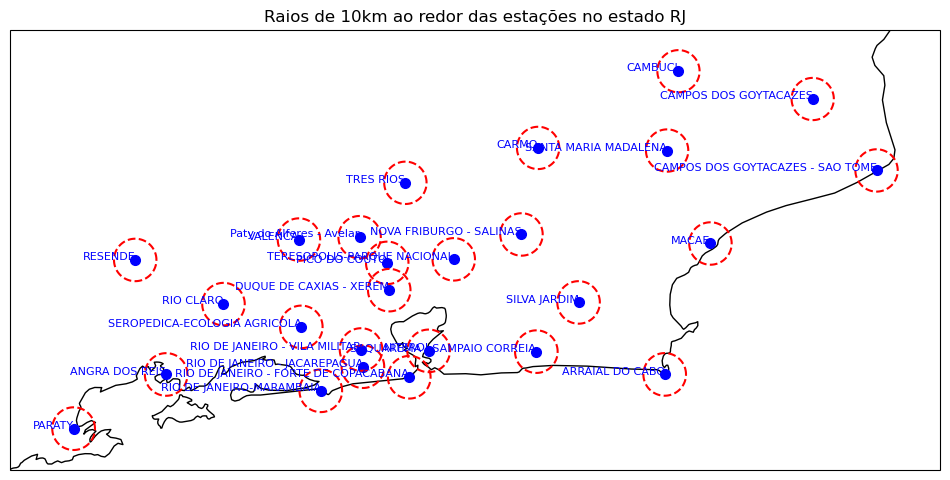

In [16]:
# plotando estações com raios de  10km.

plot_estacoes_com_raios(df_stations,'RJ')

In [24]:
"vamos filtrar só para o rj para facilitar os calculos"

df_stations = df_stations[df_stations_2023['uf'] == "RJ"]

In [30]:
models = {
    'Linear Regression': LinearRegression,
    'Random Forest': RandomForestRegressor,
    'Gradient Boosting': GradientBoostingRegressor,
    'Support Vector Machine': SVR,
    'K-Nearest Neighbors': KNeighborsRegressor,
    'ARIMA': ARIMAModel
}

# Supondo que você tenha um DataFrame `data` com suas features e target
numeric_features = ['temperatura_orvalho', 'temperatura_ar','vento_velocidade', 'umidade_relativa']
categorical_features = ['vento_direcao']
target = 'precipitacao'

metrics_df = train_and_evaluate_models(models, df_stations, numeric_features, categorical_features, target)
print(metrics_df)

NameError: name 'ARIMAModel' is not defined